In [1]:
!nvidia-smi

Tue Aug 22 11:18:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
import os

ROOT = "/content/drive/MyDrive/Colab Notebooks/DL/Regression_ANN"
os.chdir(ROOT)

In [5]:
!pwd

/content/drive/MyDrive/Colab Notebooks/DL/Regression_ANN


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
housing = fetch_california_housing()

In [8]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
X_data = pd.DataFrame(housing['data'], columns= housing['feature_names'])

In [10]:
X_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
y_data = pd.DataFrame(housing.target, columns = housing.target_names)

In [12]:
y_data.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [13]:
print(X_data.shape)
print(y_data.shape)

(20640, 8)
(20640, 1)


In [14]:
X_train_full, X_test, y_train_full, y_test= train_test_split(X_data, y_data, random_state = 42)

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 26)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(11610, 8)
(11610, 1)
(3870, 8)
(3870, 1)
(5160, 8)
(5160, 1)


In [17]:
X_train.shape[1:]

(8,)

In [18]:
LAYERS = [
    tf.keras.layers.Dense(30,activation="relu", input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1)
]

In [19]:
model  =tf.keras.models.Sequential(LAYERS)

In [20]:
def coeff_determination(y_true, y_pred):
  from keras import backend as K
  SS_res = K.sum(K.square(y_true-y_pred))
  SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
  return (1-SS_res/(SS_tot+K.epsilon()))

In [21]:
LOSS  = "mse"
OPTIMIZER = "sgd"
model.compile(optimizer = OPTIMIZER, loss= LOSS, metrics = [coeff_determination])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [23]:
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_valid1  =scaler.transform(X_valid)
X_test1  = scaler.transform(X_test)

In [24]:
model1  =tf.keras.models.Sequential(LAYERS)

In [25]:
model1.compile(optimizer = OPTIMIZER, loss= LOSS, metrics = [coeff_determination])

In [26]:
EPOCHS = 10
history = model.fit(X_train1, y_train, epochs = EPOCHS, validation_data=(X_valid1, y_valid), batch_size = 32)

Epoch 1/10
363/363 [==============================] - 7s 5ms/step - loss: 1.4340 - coeff_determination: -0.0925 - val_loss: 0.5720 - val_coeff_determination: 0.5432
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5095 - coeff_determination: 0.5945 - val_loss: 0.4609 - val_coeff_determination: 0.6321
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4307 - coeff_determination: 0.6547 - val_loss: 0.4010 - val_coeff_determination: 0.6836
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3996 - coeff_determination: 0.6821 - val_loss: 0.3948 - val_coeff_determination: 0.6855
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3892 - coeff_determination: 0.6884 - val_loss: 0.3818 - val_coeff_determination: 0.7002
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3890 - coeff_determination: 0.6903 - val_loss: 0.3660 - val_coeff_determination: 0.7125
Epoch 7/10
363/

In [27]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,1.434012,-0.092480,0.572031,0.543232
1,0.509518,0.594499,0.460944,0.632119
2,0.430740,0.654715,0.400963,0.683625
3,0.399567,0.682131,0.394768,0.685453
4,0.389235,0.688417,0.381766,0.700193
5,0.389026,0.690330,0.365965,0.712492
6,0.366245,0.705773,0.361431,0.713813
7,0.361222,0.712765,0.354757,0.721255
8,0.354480,0.714045,0.347289,0.726598
9,0.348779,0.719257,0.353189,0.719687


<Axes: >

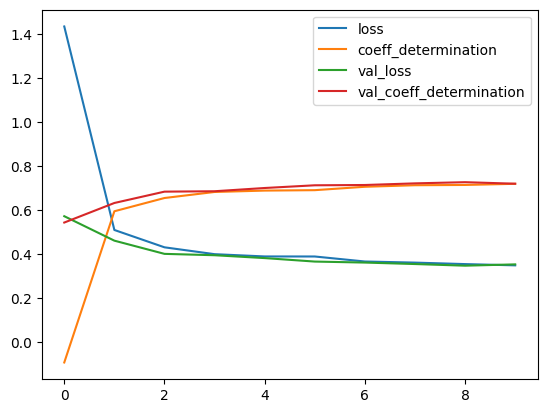

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
model.evaluate(X_test1, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3541 - coeff_determination: 0.7076


[0.3541257977485657, 0.7075558304786682]